In [1]:
#SETUP always run this
import math
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = "output.csv"

def get_column_from_csv(file, col_name):
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df[col_name]


tickers = get_column_from_csv(path, "Ticker")
tickers = tickers.tolist()
print(len(tickers))



70


In [2]:
#Optional - RUN THIS ONCE A DAY TO GET THE LATEST DATA. Takes a while to run.
def getAllData(tickers):
    anchorData = yf.download(tickers)
    anchorData.head()
    closingPrices = anchorData["Close"]
    closingPrices.to_csv("AllClosingPricesToday.csv")
    closingPrices = pd.read_csv("AllClosingPricesToday.csv")
    return closingPrices

def getSearchRange(start, end):
    return closingPrices[closingPrices['Date'].between(start, end)]

closingPrices = getAllData(tickers)


[*********************100%***********************]  70 of 70 completed


In [2]:
# Read in closing prices from saved CSV file if needed
closingPrices = pd.read_csv("latestClose.csv")
closingPrices.tail()

tickers = closingPrices.columns.to_list()[1::]
def getSearchRange(start, end):
    return closingPrices[closingPrices['Date'].between(start, end)]


In [3]:

closingPrices.tail()

,Date,A,AA,AAL,AAN,AAON,AAP,AAPL,AAT,AAWW,...,ZNH,ZNTL,ZS,ZTO,ZTS,ZUMZ,ZUO,ZWS,ZYME,ZYXI
574,2023-04-17 00:00:00-04:00,140.190002,40.799999,13.10,10.650,95.980003,126.870003,165.229996,18.250000,NaN,...,NaN,19.610001,105.589996,28.780001,174.619995,18.559999,8.790,20.90,10.22,11.9400
575,2023-04-18 00:00:00-04:00,139.000000,42.150002,13.29,10.430,97.250000,126.650002,166.470001,17.750000,NaN,...,NaN,20.219999,103.559998,28.740000,174.449997,18.200001,8.650,20.90,9.98,11.6100
576,2023-04-19 00:00:00-04:00,138.929993,41.220001,13.63,10.350,98.150002,128.110001,167.630005,18.370001,NaN,...,NaN,20.139999,102.959999,28.959999,174.979996,17.639999,8.790,21.07,9.89,11.9800
577,2023-04-20 00:00:00-04:00,135.529999,40.230000,13.32,10.320,99.260002,128.369995,166.649994,18.180000,NaN,...,NaN,20.000000,100.489998,29.030001,174.399994,17.950001,8.620,20.77,9.83,11.9100
578,2023-04-21 00:00:00-04:00,136.649994,39.185001,13.26,10.135,99.489998,128.860001,165.449997,18.090000,NaN,...,NaN,20.350000,101.025101,28.340000,176.240005,17.959999,8.715,20.91,9.90,11.9135


In [10]:
# Run this this cell if we want to look at stocks releative to a low point. No harm in running even if not used. 
def getMinPrice(tickers, start, end):
    validTickers = {}
    invalidTickers = []
    searchRange = getSearchRange(start, end)
    for ticker in tickers:
        
        if ticker not in searchRange:
            invalidTickers.append(ticker)
            continue
        lowest = min(searchRange[ticker])

        if math.isnan(lowest):
            invalidTickers.append(ticker)
        else:
            validTickers[ticker] = round(lowest, 2)


    todaysTickers = list(validTickers.keys())
    todaysTickers.sort()
    return validTickers, invalidTickers, todaysTickers


In [12]:
# Run this this cell if we want to look at stocks relative to a high point. No harm in running even if not used. 
def getMaxPrice(tickers, start, end):
    validTickers = {}
    invalidTickers = []
    searchRange = getSearchRange(start, end)
    for ticker in tickers:
        
        if ticker not in searchRange:
            invalidTickers.append(ticker)
            continue
       
        lowest = max(searchRange[ticker])
        if math.isnan(lowest):
            invalidTickers.append(ticker)
        else:
            validTickers[ticker] = round(lowest, 2)


    todaysTickers = list(validTickers.keys())
    todaysTickers.sort()
    return validTickers, invalidTickers, todaysTickers

In [13]:
#Search Range for Greater than - ONLY RUN OF OF THESE AT A TIME. The data gets overwritten.
validTickers, invalidTickers, todaysTickers = getMaxPrice(tickers, "2022-10-13 00:00:00-05:00", "2022-12-15 00:00:00-05:00")
print(len(todaysTickers))
print(invalidTickers, len(invalidTickers))


3352
['ACRV', 'AKO/A', 'AKO/B', 'ALL/PB', 'ATAT', 'BAM', 'BF/A', 'BF/B', 'BML/PL', 'BRK/A', 'BRK/B', 'C/PK', 'CDEV', 'CEA', 'CIG/C', 'CR', 'CWEN/A', 'EBR/B', 'EVN', 'GEF/B', 'GEHC', 'GLOP/PA', 'GRP/U', 'HEI/A', 'LEN/B', 'LGF/A', 'LGF/B', 'MBC', 'MKC/V', 'MOG/A', 'MS/PA', 'MSGE', 'NFGFF', 'PBR/A', 'PRME', 'RXO', 'WFC/PL', 'ZNH'] 38


In [5]:
#Search Range for Less than - ONLY RUN OF OF THESE AT A TIME. The data gets overwritten.
validTickers, invalidTickers, todaysTickers = getMinPrice(tickers, "2022-09-21 00:00:00-05:00", "2022-11-10 00:00:00-05:00")
print(len(todaysTickers))
print(invalidTickers, len(invalidTickers))

3350
['ACRV', 'AKO/A', 'AKO/B', 'ALL/PB', 'ATAT', 'BAM', 'BF/A', 'BF/B', 'BHVN', 'BML/PL', 'BRK/A', 'BRK/B', 'C/PK', 'CDEV', 'CEA', 'CIG/C', 'CR', 'CWEN/A', 'EBR/B', 'EVN', 'GEF/B', 'GEHC', 'GLOP/PA', 'GRP/U', 'HEI/A', 'LEN/B', 'LGF/A', 'LGF/B', 'MBC', 'MKC/V', 'MOG/A', 'MS/PA', 'MSGE', 'NFGFF', 'PBR/A', 'PRME', 'RXO', 'SDRL', 'WFC/PL', 'ZNH'] 40


In [12]:
validTickers

{'ACMR': 7.08,
 'AOSL': 27.82,
 'CAN': 1.89,
 'CEVA': 24.72,
 'LASR': 9.41,
 'MX': 8.63,
 'SKYT': 6.68,
 'VLN': 4.4,
 'WISA': 9.0,
 'ADEA': 9.29,
 'AEHR': 17.27,
 'COHU': 31.12,
 'HIMX': 6.21,
 'ICHR': 25.58,
 'IMOS': 20.66,
 'INFN': 6.41,
 'NVTS': 3.22,
 'PLAB': 16.17,
 'SGH': 14.48,
 'SMTC': 26.87,
 'UCTT': 32.05,
 'ACLS': 77.38,
 'AEIS': 82.75,
 'AMBA': 76.81,
 'AMKR': 23.58,
 'CRUS': 72.4,
 'DIOD': 74.09,
 'FORM': 21.45,
 'IDCC': 47.9,
 'KLIC': 42.98,
 'MKSI': 80.72,
 'MTSI': 60.75,
 'MXL': 32.3,
 'NVMI': 79.23,
 'ONTO': 66.0,
 'POWI': 70.09,
 'RMBS': 35.02,
 'SIMO': 62.11,
 'SITM': 96.14,
 'SLAB': 130.71,
 'TSEM': 43.06,
 'ADI': 159.69,
 'ALGM': 28.86,
 'AMAT': 94.23,
 'AMD': 62.33,
 'ASML': 531.64,
 'ASX': 6.16,
 'AVGO': 544.02,
 'ENTG': 62.71,
 'GFS': 51.02,
 'INTC': 25.54,
 'KLAC': 367.76,
 'LRCX': 402.8,
 'LSCC': 62.5,
 'MCHP': 67.87,
 'MPWR': 340.28,
 'MRVL': 34.68,
 'MU': 49.12,
 'NVDA': 140.36,
 'NXPI': 151.7,
 'ON': 59.74,
 'QCOM': 106.97,
 'QRVO': 87.79,
 'STM': 34.78,
 '

In [17]:
# Just needs to be run once to ensure the cell is active. 
def counter(date):
    count = 0.0
    searchFor = []
    antiSearch = []
    total = len(todaysTickers)
    for ticker in todaysTickers:
        if math.isnan(date[ticker]):
            total -=1
        elif date[ticker] > validTickers[ticker]:
            count += 1
            searchFor.append(ticker)
        else:
            antiSearch.append(ticker)

    percent = round(count/total, 4)
    return [percent, searchFor]

In [14]:
# date range to create graph on
targetRange = getSearchRange("2022-12-15 00:00:00-05:00", "2023-04-30 00:00:00-05:00")

# Number of days in the target range
print(targetRange.shape[0])

targetRange.tail()

92


,Date,A,AA,AAL,AAN,AAON,AAP,AAPL,AAT,AAWW,...,ZNH,ZNTL,ZS,ZTO,ZTS,ZUMZ,ZUO,ZWS,ZYME,ZYXI
579,2023-04-24 00:00:00-04:00,138.479996,38.040001,13.32,10.22,98.620003,126.830002,165.330002,17.850000,NaN,...,NaN,21.500000,100.660004,27.940001,176.350006,17.600000,8.40,21.410000,9.77,11.78
580,2023-04-25 00:00:00-04:00,130.369995,35.750000,12.84,12.62,97.629997,123.779999,163.770004,17.389999,NaN,...,NaN,21.790001,92.320000,27.459999,173.020004,16.690001,7.95,20.969999,9.07,11.50
581,2023-04-26 00:00:00-04:00,133.119995,35.450001,12.74,13.13,93.919998,122.330002,163.759995,17.889999,NaN,...,NaN,21.430000,93.070000,27.459999,172.940002,17.120001,7.99,20.440001,8.74,11.16
582,2023-04-27 00:00:00-04:00,133.250000,36.270000,12.88,13.23,99.220001,124.900002,168.410004,18.290001,NaN,...,NaN,21.790001,93.419998,27.389999,173.949997,17.320000,7.90,20.700001,8.48,11.27
583,2023-04-28 00:00:00-04:00,135.429993,37.139999,13.64,13.35,98.000000,125.529999,169.679993,18.200001,NaN,...,NaN,22.030001,90.099998,27.680000,175.779999,17.490000,7.79,21.549999,8.40,11.44


[0.0084, 0.0197, 0.0128, 0.0254, 0.051, 0.0459, 0.0582, 0.0719, 0.0459, 0.0755, 0.0749, 0.0761, 0.1256, 0.1131, 0.1784, 0.1769, 0.2115, 0.2592, 0.2953, 0.3112, 0.3076, 0.2679, 0.2458, 0.3034, 0.344, 0.3386, 0.3482, 0.3805, 0.395, 0.347, 0.4192, 0.4672, 0.5167, 0.4902, 0.4511, 0.4711, 0.4376, 0.3902, 0.3911, 0.4329, 0.4254, 0.4463, 0.423, 0.4254, 0.3377, 0.3461, 0.3604, 0.3351, 0.3434, 0.3428, 0.3457, 0.3544, 0.3859, 0.3548, 0.3227, 0.3276, 0.277, 0.23, 0.212, 0.2395, 0.2075, 0.236, 0.2067, 0.2232, 0.2481, 0.2163, 0.2175, 0.2244, 0.2385, 0.2426, 0.2609, 0.2675, 0.2984, 0.2991, 0.2746, 0.2614, 0.265, 0.2747, 0.2912, 0.2879, 0.3014, 0.2924, 0.3011, 0.3056, 0.3032, 0.2987, 0.2987, 0.2977, 0.2665, 0.2509, 0.2743, 0.2915] 92


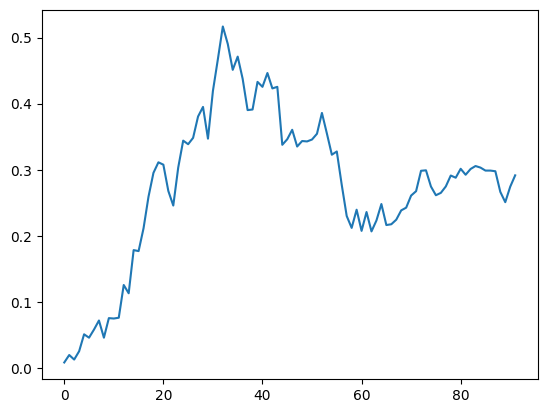

In [18]:
percents = []
for i in range(targetRange.shape[0]):
    percents.append(counter(targetRange.iloc[i])[0])
print(percents, len(percents))

#plot 
ys = percents
xs = range(len(ys))
plt.plot(xs, ys)
plt.show()
plt.close()

In [ ]:
percents = []
output = []
for i in range(targetRange.shape[0]):
    percents.append(counter(targetRange.iloc[i])[0])
    output = counter(targetRange.iloc[i])[1]
print(percents, len(percents))

#Write output to a csv file
with open('output.csv', 'w') as f:
    for item in output:
        f.write(item + "\n")

#plot 
ys = percents
xs = range(len(ys))
plt.plot(xs, ys)
plt.show()
plt.close()